<a href="https://colab.research.google.com/github/sipocz/_earthQuake/blob/main/EarthQuaqe_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#EarthQuake
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import sweetviz as sw

!pip install sweetviz
import sweetviz as sw


Mounted at /content/drive


In [4]:
df=pd.read_csv("/content/drive/My Drive/001_AI/_EarthQuake/features_a.csv")
df_clasters=pd.read_csv("/content/drive/My Drive/001_AI/_EarthQuake/train_labels.csv")

In [5]:
Y=df_clasters[["damage_grade"]]
X=df

In [6]:
len(X.columns)


X=X[:10000]
Y=Y[:10000]

In [7]:
from sklearn.linear_model import Lasso
alpha=0.000001
lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e6)
lassoreg.fit(X,Y)
lassopred = lassoreg.predict(X)


In [8]:
df.columns

Index(['Unnamed: 0', 'geo_level_1_id', 'geo_level_2_id', 'count_floors_pre_eq',
       'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_other',
       'land_surface_condition_t', 'land_surface_condition_o',
       'foundation_type_h', 'foundation_type_w', 'foundation_type_i',
       'foundation_typ

In [9]:
from sklearn.preprocessing import StandardScaler
# Separating out the features
X
# Separating out the target
Y
# Standardizing the features
X = StandardScaler().fit_transform(X)

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['p1', 'p2', 'p3'])

In [11]:
principalDf.head()

,p1,p2,p3
0,-1.113681,1.692528,-0.205095
1,-0.735387,0.350752,-1.198704
2,-0.688124,0.276734,-0.306627
3,-1.193459,-1.353587,1.066526
4,-0.202690,1.406377,1.009244


In [12]:
Y[["damage_grade"]]

,damage_grade
0,3
1,2
2,3
3,2
4,3
...,...
9995,2
9996,2
9997,3
9998,2


In [13]:
Y

,damage_grade
0,3
1,2
2,3
3,2
4,3
...,...
9995,2
9996,2
9997,3
9998,2


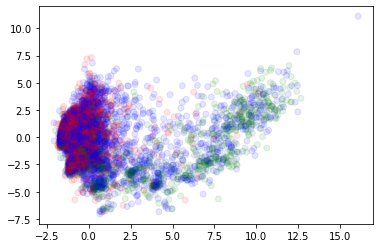

In [14]:
color=["","green","blue","red"]
colorl=[color[i] for i in list(Y["damage_grade"])]
plt.scatter(principalDf[["p1"]],principalDf[["p2"]], c=colorl, alpha=0.1)

In [15]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
from sklearn.cluster import MeanShift
import sklearn.cluster as cluster


from sklearn.decomposition import PCA

In [16]:
n_cluster_num=3
df_feature=X
clusterer = KMeans(n_clusters=n_cluster_num, random_state=10)
cluster_labels_Kmeans = clusterer.fit_predict(df_feature)



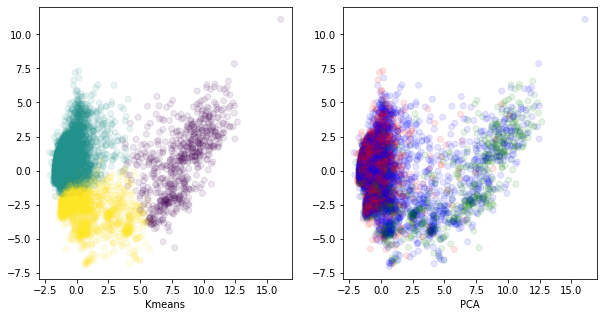

In [17]:
# Kezdjünk új ábrát (plt.figure)!
plt.figure(figsize=(10,5))
# Rajzoljunk a plt.scatter segítségével!
# Segítség: X_pca[:, 0], X_pca[:, 1], c=Y
plt.subplot(121)
plt.xlabel("Kmeans")
plt.scatter(principalDf[["p1"]],principalDf[["p2"]],c=cluster_labels_Kmeans,alpha=0.1)
plt.subplot(122)
plt.xlabel("PCA")
plt.scatter(principalDf[["p1"]],principalDf[["p2"]], c=colorl, alpha=0.1)

# Állítsuk be a tengelyek címkéit és a címet!

plt.show()

In [18]:
cluster_labels_Kmeans=[]

In [19]:
clusterer=DBSCAN(eps=0.395)
cluster_label_DBScan=clusterer.fit_predict(df_feature)
print(set(cluster_label_DBScan))


{0, 1, 2, -1}


In [20]:
color=["","green","blue","red"]
colorpca=[color[i] for i in list(Y["damage_grade"])]

color2=["red","green","blue","red"]

colordbs=[color2[i] for i in list(cluster_label_DBScan)]


In [21]:
def calculacio(db):
    db=list(db)
    _a0=db.count(0)
    _a1=db.count(1)
    _a2=db.count(2)
    _a3=db.count(3)
    print(f"0:{_a0:4} \\ 1:{_a1:4} \\ 2:{_a2:4} \\ 3:{_a3:4}")
    

In [22]:
#eps=0.392 szemre nagyon jó eredményt produkál NEm lehet ilyen!!

# 0,3919 -- 0.3900 
a=np.linspace(0.8,0.8,1) 
for epsx in a:
    clusterer=DBSCAN(eps=epsx)
    cluster_label_DBScan=clusterer.fit_predict(df_feature)
    print (epsx,end="-->")
    print(set(cluster_label_DBScan))
    calculacio(cluster_label_DBScan)
    #calculacio(Y["damage_grade"])



0.8-->{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, -1}
0: 903 \ 1: 118 \ 2:  36 \ 3:   7


In [23]:
colorpca[0:20]

['red',
 'blue',
 'red',
 'blue',
 'red',
 'blue',
 'red',
 'green',
 'blue',
 'green',
 'red',
 'blue',
 'blue',
 'red',
 'red',
 'blue',
 'blue',
 'red',
 'blue',
 'red']

Több clusterre kellene osztani. Vizsgálni kellene melyik kluszter melyik 

In [24]:



    
# ----------- Neural network - Multi-layer Perceptron  ------------
from sklearn.neural_network import MLPClassifier

# build the model on training data
model=MLPClassifier(max_iter=220000,alpha=0.00001)
a=model.fit(X, Y)

    # make predictions for test data
y_pred = model.predict(X)
    # calculate the accuracy score
accuracy =  accuracy_score(Y, y_pred) * 100

print(accuracy)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


80.12


In [25]:
Y

,damage_grade
0,3
1,2
2,3
3,2
4,3
...,...
9995,2
9996,2
9997,3
9998,2


In [26]:
model.coefs_

[array([[-0.15865611, -0.08851628,  0.33702003, ..., -0.02722181,
         -0.17978923,  0.42501498],
        [-0.74131402,  0.13617223,  0.49189976, ..., -0.44920258,
          0.62131855, -0.02315365],
        [-0.40967978,  0.56194045, -0.23638771, ...,  0.3682049 ,
         -0.32804734,  0.24981558],
        ...,
        [ 0.02280559,  0.10321184, -0.27795096, ..., -0.71041537,
          0.11465285, -0.04415369],
        [-0.37905464,  0.16460134,  0.01561185, ...,  0.08152196,
          0.00938687,  0.09235156],
        [ 0.35150785,  0.21730266,  0.52365036, ...,  0.17478363,
          0.83888565,  0.31260834]]),
 array([[ 0.74552834, -0.17537269, -0.56949916],
        [ 0.99875969, -0.60630505, -0.48082768],
        [-0.08349983,  0.70465961, -0.7888901 ],
        [ 0.14284437, -0.85334459,  0.60718242],
        [ 0.15822932, -0.72196141,  0.87457778],
        [ 0.10673371,  0.66318947, -0.91674828],
        [-0.12938085, -0.66214278,  0.48331663],
        [-0.68026045,  1.02559

      damage_grade
0                3
1                2
2                3
3                2
4                3
...            ...
9995             2
9996             2
9997             3
9998             2
9999             1

[10000 rows x 1 columns]


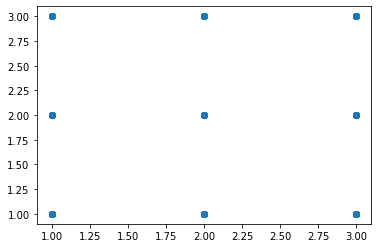

In [27]:
plt.scatter(Y,y_pred)
print(Y)

In [28]:
nr=range(1,10000)
jo=0
rossz=0
for i in nr:
    if list(Y["damage_grade"])[i]==y_pred[i]:
        jo+=1
    else:
        rossz+=1
print(f"jo: {jo} rossz:{rossz} ")       

jo: 8011 rossz:1988 


In [29]:
Y

,damage_grade
0,3
1,2
2,3
3,2
4,3
...,...
9995,2
9996,2
9997,3
9998,2


In [30]:
begi=10000
endi=30000
X2=df
X2=df[begi:endi]
Y2=df_clasters[["damage_grade"]]
Y2=Y2[begi:endi]
X2 = StandardScaler().fit_transform(X2)
y_pred = model.predict(X2)
    # calculate the accuracy score
accuracy =  accuracy_score(Y2, y_pred) * 100
print(Y2)
print(accuracy)


       damage_grade
10000             2
10001             2
10002             2
10003             3
10004             2
...             ...
29995             3
29996             3
29997             2
29998             2
29999             2

[20000 rows x 1 columns]
56.24


In [31]:
Y2

,damage_grade
10000,2
10001,2
10002,2
10003,3
10004,2
...,...
29995,3
29996,3
29997,2
29998,2


In [34]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
model=MLPClassifier(max_iter=2220000,alpha=0.0000000001,warm_start=True,hidden_layer_sizes=(2000,100,50,10 ), solver="sgd", verbose=True,momentum=0.5)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: ignored

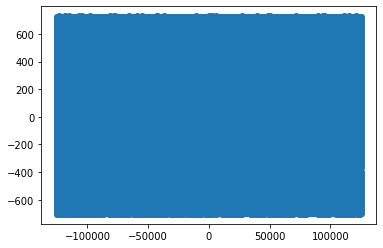

In [41]:
from sklearn.neural_network import MLPClassifier

begi=10000
endi=296000
X2=df
X2=df[begi:endi]
Y2=df_clasters[["damage_grade"]]
Y2=Y2[begi:endi]

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X2)
principalDf = pd.DataFrame(data = principalComponents, columns = ['p1', 'p2', 'p3'])

plt.scatter(principalDf["p1"],principalDf["p2"])

# build the model on training data

#print(Y2)

a=model.fit(principalDf, Y2)

    # make predictions for test data
y_pred2 = model.predict(X2)
    # calculate the accuracy score
accuracy =  accuracy_score(Y2, y_pred2) * 100

print(accuracy)